## Ensemble Techniques - Term Deposit Sale (MIRV)

### Goal 
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

### Attribute information 
Input variables: 
 
Bank client data: 
1. age: Continuous feature  
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced) 
4. education: education level (primary, secondary, tertiary) 
5. default: has credit in default?  
6. housing: has housing loan?  
7. loan: has personal loan? 
8. balance in account 
 
Related to previous contact: 
9. contact: contact communication type 
10. month: last contact month of year 
11. day: last contact day of the month 
12. duration: last contact duration, in seconds* 
 
Other attributes: 
 
13.  campaign: number of contacts performed during this campaign and for this client 
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days) 
15. previous: number of contacts performed before this campaign and for this client 
16. poutcome: outcome of the previous marketing campaign 
 
Output variable (desired target): 

17. Target: Tell us has the client subscribed a term deposit. (Yes, No) 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
#sns.set (style="white")
#sns.set (style="whitegrid", color_codes=True)
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import pydotplus as pydot
import graphviz
from IPython.display import display
from sklearn import tree
from os import system


### Import file and basic information

In [2]:
bank_df = pd.read_csv("bank-full.csv")
print('data shape :', bank_df.shape)
bank_df.head().T

data shape : (45211, 17)


,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
bank_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [6]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
# coverting "yes" by 1 and "no" by 0 for further analysis
cat_col=['default','housing','loan','Target']
for cat in bank_df[cat_col]:
    bank_df[cat]=bank_df[cat].apply(lambda x: 1 if x=='yes' else 0)

In [8]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# 1.0.- Exploratory Data Quality

<p style="color:blue;">1.1  Univariante Analysis </p>
 data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.  b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment. c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

Customers Average age : 40.94


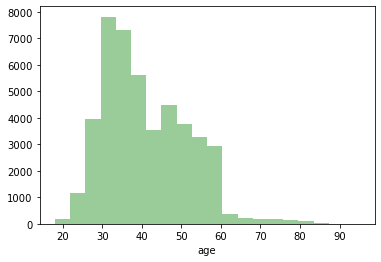

In [9]:
# 1.- Age distribution
print('Customers Average age :', round(bank_df.age.mean(),2))
sns.distplot(bank_df.age, kde=False, bins=20, color='g');

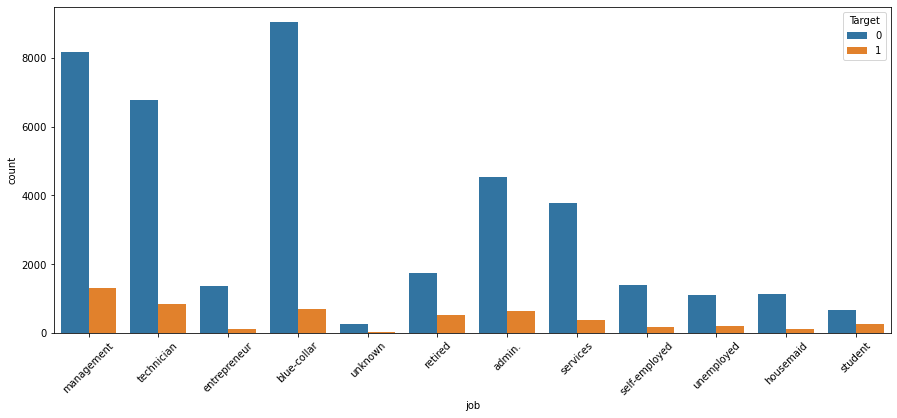

In [10]:
# 2.- Type of Job
plt.figure(figsize=(15,6))
ax=sns.countplot(x='job', data=bank_df, hue='Target')
plt.setp(ax.get_xticklabels(), rotation=45);

- 5 top customer professions: Blue-collar, management, technician, admin, and services 
- Highest customers profession with term deposit: management

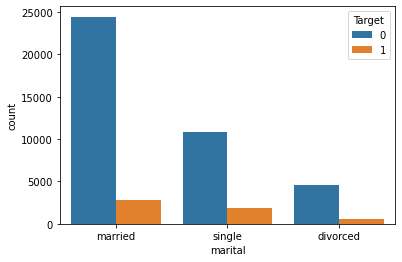

In [11]:
# 3.- Marital status
sns.countplot(x='marital', data=bank_df, hue='Target');

- Maiority of the customers are married followed by singles and divorced
- Married customer have the highest approval term deposit

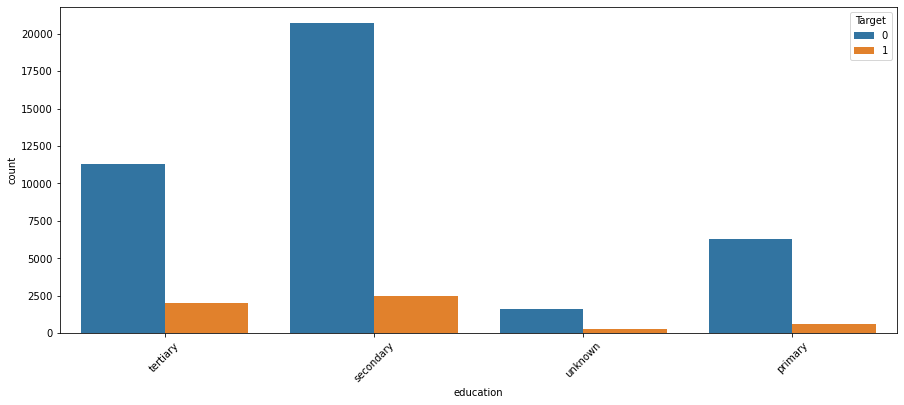

In [12]:
# 4.- Education level
plt.figure(figsize=(15,6))
ax=sns.countplot(x='education', data=bank_df, hue='Target')
plt.setp(ax.get_xticklabels(), rotation=45);

More customers with secondary education have term deposit 

Percent of customer with credit default : 1.8 %
Percent of customer with no credit default : 98.2 %
# Customers with credit default that have term deposit : 52
# Customers with no credit default that have term deposit : 5237


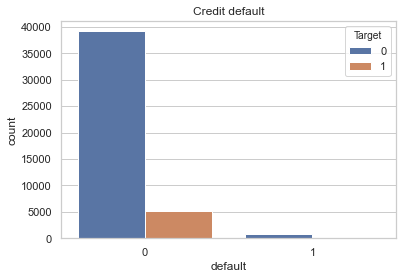

In [303]:
# 5.- Credit default analysis
sns.countplot(x='default', data=bank_df, hue='Target');
plt.title("Credit default");
sy = len(bank_df[bank_df.default==1])
sn = len(bank_df[bank_df.default==0])
print('Percent of customer with credit default :', round(sy/(sy+sn)*100,2),"%")
print('Percent of customer with no credit default :', round(sn/(sy+sn)*100,2),"%")
cd = bank_df.Target[(bank_df.default==1)&(bank_df.Target==1)].count()
print('# Customers with credit default that have term deposit :', cd)
cd2 = bank_df.Target[(bank_df.default==0)&(bank_df.Target==1)].count()
print('# Customers with no credit default that have term deposit :', cd2)

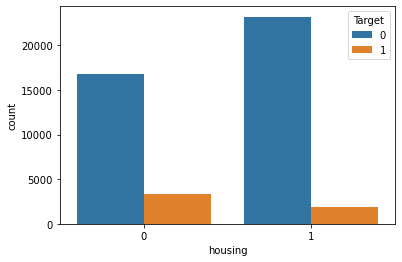

In [14]:
# 6.- Housing loan analysis
sns.countplot(x='housing', data=bank_df, hue='Target');

In [15]:
pd.crosstab(bank_df.housing, bank_df.Target, normalize=True)

Target,0,1
housing,,
0,0.369976,0.074185
1,0.513039,0.042799


Between the customers with long term deposit, the maiority of them have not housing loan.  

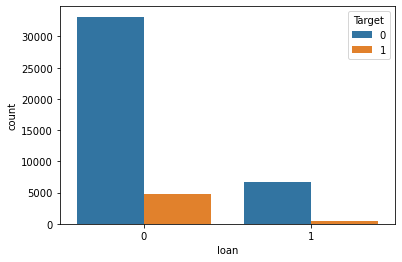

In [16]:
# 7.- Customers with personal Loan
sns.countplot(x='loan', data=bank_df, hue='Target');

In [17]:
pd.crosstab(bank_df.loan, bank_df.Target, normalize=True)

Target,0,1
loan,,
0,0.733494,0.106279
1,0.149521,0.010705


Between the customers with long term deposit, the maiority of them have not personal loan.  

Customer with negative balance account : 3766 / 8.33 %
Customer with zero balance account : 3514 / 7.77 %
Customer with balance account between <0, 5,000] : 35086 / 77.61 %
Customer with balance account higher than 5,000 : 2845 / 6.29 %
Average customer balance : 1362.27
Right skewed distribution (mean - median is positive) : 914.27


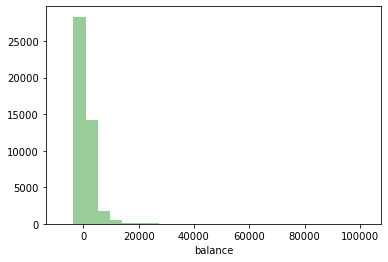

In [18]:
# 8.- Balance in account analysis
nbc = bank_df.balance[bank_df.balance<0].count()
print('Customer with negative balance account :',nbc, '/', round(nbc/bank_df.shape[0]*100,2),"%")
zbc=bank_df.balance[bank_df.balance==0].count()
print('Customer with zero balance account :', zbc, '/', round(zbc/bank_df.shape[0]*100,2),"%")
pbc = bank_df.balance[(bank_df.balance>0) & (bank_df.balance<=5000)].count()
print('Customer with balance account between <0, 5,000] :', pbc, '/', round(pbc/bank_df.shape[0]*100,2),"%")
hbc = bank_df.balance[bank_df.balance>5000].count()
print('Customer with balance account higher than 5,000 :', hbc, '/', round(hbc/bank_df.shape[0]*100,2),"%")
sns.distplot(bank_df.balance, kde=False, bins=25, color='g');
ban_median = bank_df.balance.median()
ban_mean = bank_df.balance.mean()
print('Average customer balance :', round(ban_mean,2))
print('Right skewed distribution (mean - median is positive) :',round(ban_mean-ban_median,2))

<p style="color:red;">  Analysis related to previous contact </p>

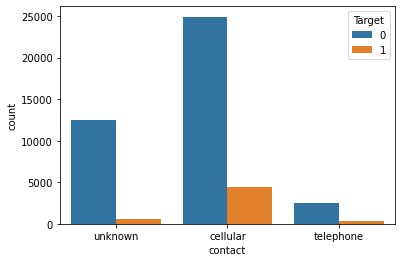

In [19]:
# 9.- Customers last contact communication type
sns.countplot(x='contact', data=bank_df, hue='Target');

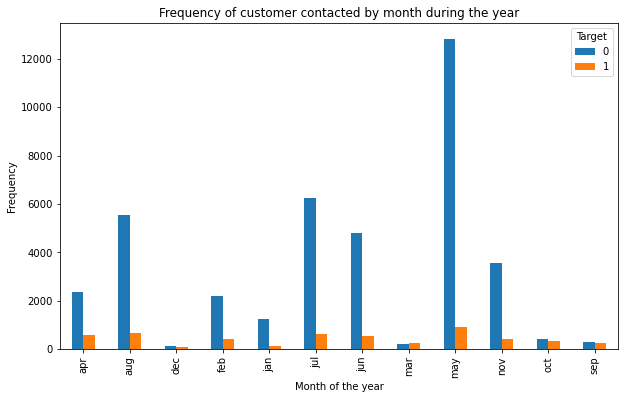

In [20]:
# 10.- Last concat day of the month
pd.crosstab(bank_df.month,bank_df.Target).plot(kind='bar', figsize=(10,6));
plt.title('Frequency of customer contacted by month during the year');
plt.xlabel('Month of the year');
plt.ylabel('Frequency');

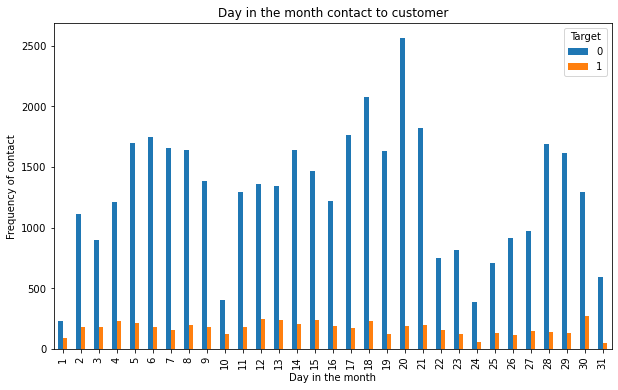

In [21]:
# 11.- last contact day of the month
pd.crosstab(bank_df.day,bank_df.Target).plot(kind='bar',figsize=(10,6));
plt.title('Day in the month contact to customer');
plt.xlabel('Day in the month');
plt.ylabel('Frequency of contact');

Average contact duration time in seconds : 258.16
Data shows a right skewed distribution


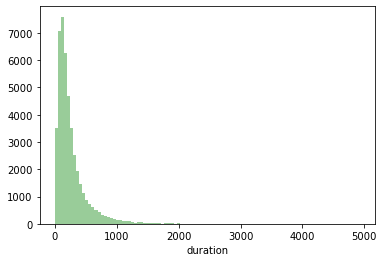

In [22]:
# 12.- Last contact duration in seconds
sns.distplot(bank_df.duration, kde=False, bins=100, color='g');
ban_median = bank_df.duration.median()
ban_mean = round(bank_df.duration.mean(),2)
print('Average contact duration time in seconds :',ban_mean)
print('Data shows a right skewed distribution')

The maiority of the customer with term deposit were contact by cellphone with an average time talking of 5 min. The calls were made more frequently in May.

<p style="color:red;">  Other attributes information</p>

Customer were contacted in Average : 2.76 times


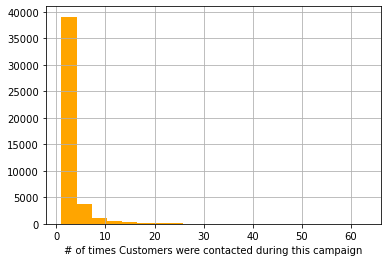

In [23]:
# 13.- campaign: number of contacts performed during this campaign and for this client
print('Customer were contacted in Average :',round(bank_df.campaign.mean(),2),'times')
bank_df.campaign.hist(bins=20, color='orange');
plt.xlabel('# of times Customers were contacted during this campaign');
#bank_df.campaign.sort_values(ignore_index=True).plot()

Customer contacted from previous campaign : 8257 or 18.26 %
Customer no contacted from previous campaign: 36954 or 81.74 %


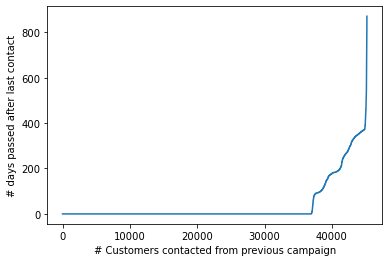

In [24]:
# 14.- pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
cnc = bank_df.pdays[bank_df.pdays==-1].count()
cc = bank_df.shape[0]-cnc
print('Customer contacted from previous campaign :',cc, 'or', round(cc/bank_df.shape[0]*100,2),'%')
print('Customer no contacted from previous campaign:',cnc, 'or', round(cnc/bank_df.shape[0]*100,2),'%')
bank_df.pdays.sort_values(ignore_index=True).plot();
plt.xlabel('# Customers contacted from previous campaign');
plt.ylabel('# days passed after last contact');
#bank_df.pdays.hist(bins=20);

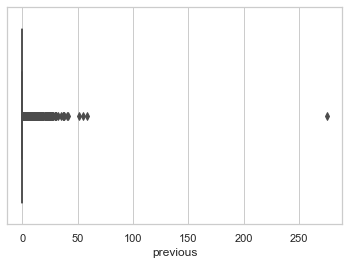

In [25]:
# 15.- previous: number of contacts performed before this campaign and for this client 
# cleaning data outlayer
sns.set(style="whitegrid")
ax = sns.boxplot(x=bank_df.previous)

In [26]:
# replacing the outlayes data higher than 250 by the median value
bank_df.loc[bank_df.previous > 250, 'previous'] = bank_df.previous.median()

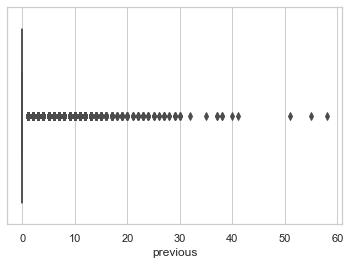

In [27]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=bank_df.previous)

Average times contacted by Customer before this campaign : 3.14


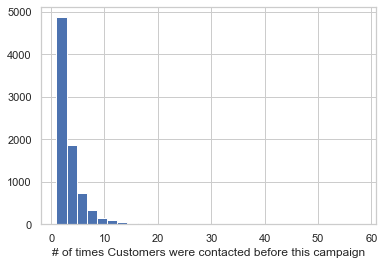

In [28]:
#previous: number of contacts performed before this campaign and for this client
pc = bank_df.previous[bank_df.previous>0].mean()
print('Average times contacted by Customer before this campaign :',round(pc,2))
bank_df.previous[bank_df.previous>0].hist(bins=30);
plt.xlabel('# of times Customers were contacted before this campaign');

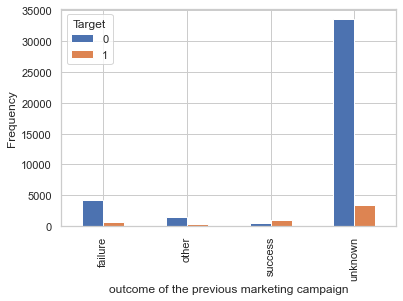

In [29]:
# 16.- poutcome: outcome of the previous marketing campaign
pd.crosstab(bank_df.poutcome, bank_df.Target).plot(kind='bar')
plt.xlabel('outcome of the previous marketing campaign');
plt.ylabel('Frequency');

Number of contacts performed during this campaign was 2.76 times/client compared to 3.14 for the previous campaign were the customer contacted were only 18.6% 

<p style="color:blue;">1.2  Bivariante Analysis </p>

Percent of subscriptors to term deposit : 11.7 %
Percent of no subscriptors to term deposit : 88.3 %


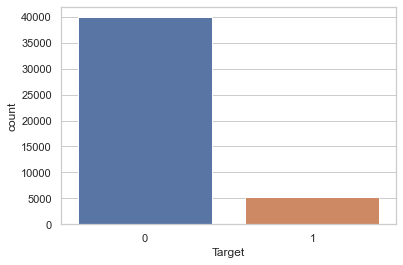

In [30]:
# 17.- Target analysis
sy = len(bank_df.Target[bank_df.Target==1])
sn = len(bank_df.Target[bank_df.Target==0])
print('Percent of subscriptors to term deposit :', round(sy/(sy+sn)*100,2),'%')
print('Percent of no subscriptors to term deposit :', round(sn/(sy+sn)*100,2),'%')
sns.countplot(x='Target', data=bank_df);

data is not proportional (ratio 1/9). Data will be sintetic modified for better performance using "SMOT"

In [31]:
# mean values respect to Target
round(bank_df.groupby('Target').mean(),2)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
Target,,,,,,,,,,
0,40.84,0.02,1303.71,0.58,0.17,15.89,221.18,2.85,36.42,0.50
1,41.67,0.01,1804.27,0.37,0.09,15.16,537.29,2.14,68.70,1.17


- Customer with long term deposit have higher average age, balance account, and were contacted for longer duration compared with customers that don't have long term deposit.
- Customer with no long term deposit have more housing loan, personal loan, and credit default than customer with long term deposit.

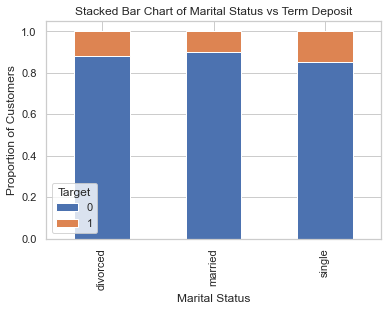

In [32]:
# Marital Status
table=pd.crosstab(bank_df.marital, bank_df.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);
plt.title('Stacked Bar Chart of Marital Status vs Term Deposit');
plt.xlabel('Marital Status');
plt.ylabel('Proportion of Customers');

Singles have the highest rate of approval term deposit

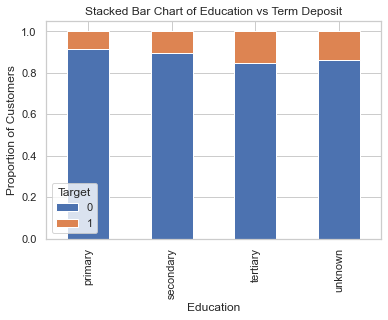

In [33]:
# Education Status
table=pd.crosstab(bank_df.education, bank_df.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Term Deposit');
plt.xlabel('Education');
plt.ylabel('Proportion of Customers');

Tertiary education have the highest rate of approval term deposit

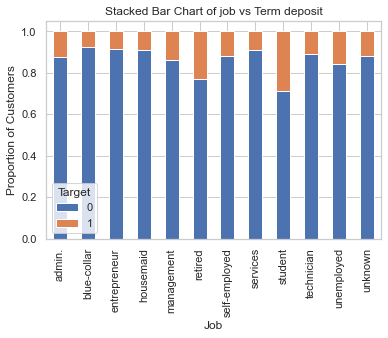

In [34]:
#Job Status
table=pd.crosstab(bank_df.job, bank_df.Target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True);
plt.title('Stacked Bar Chart of job vs Term deposit');
plt.xlabel('Job');
plt.ylabel('Proportion of Customers');

Students have the highest rate of approval term deposit

In [35]:
# Preparing data for pairplot
biv = bank_df.copy()
# dropping columns with unique values below 5
for nun in bank_df:
    if bank_df[nun].nunique()<5:
        biv.drop(columns=nun, inplace=True)
biv.shape

(45211, 9)

In [36]:
# choosing no object data type
biv.select_dtypes(exclude ='object').shape

(45211, 7)

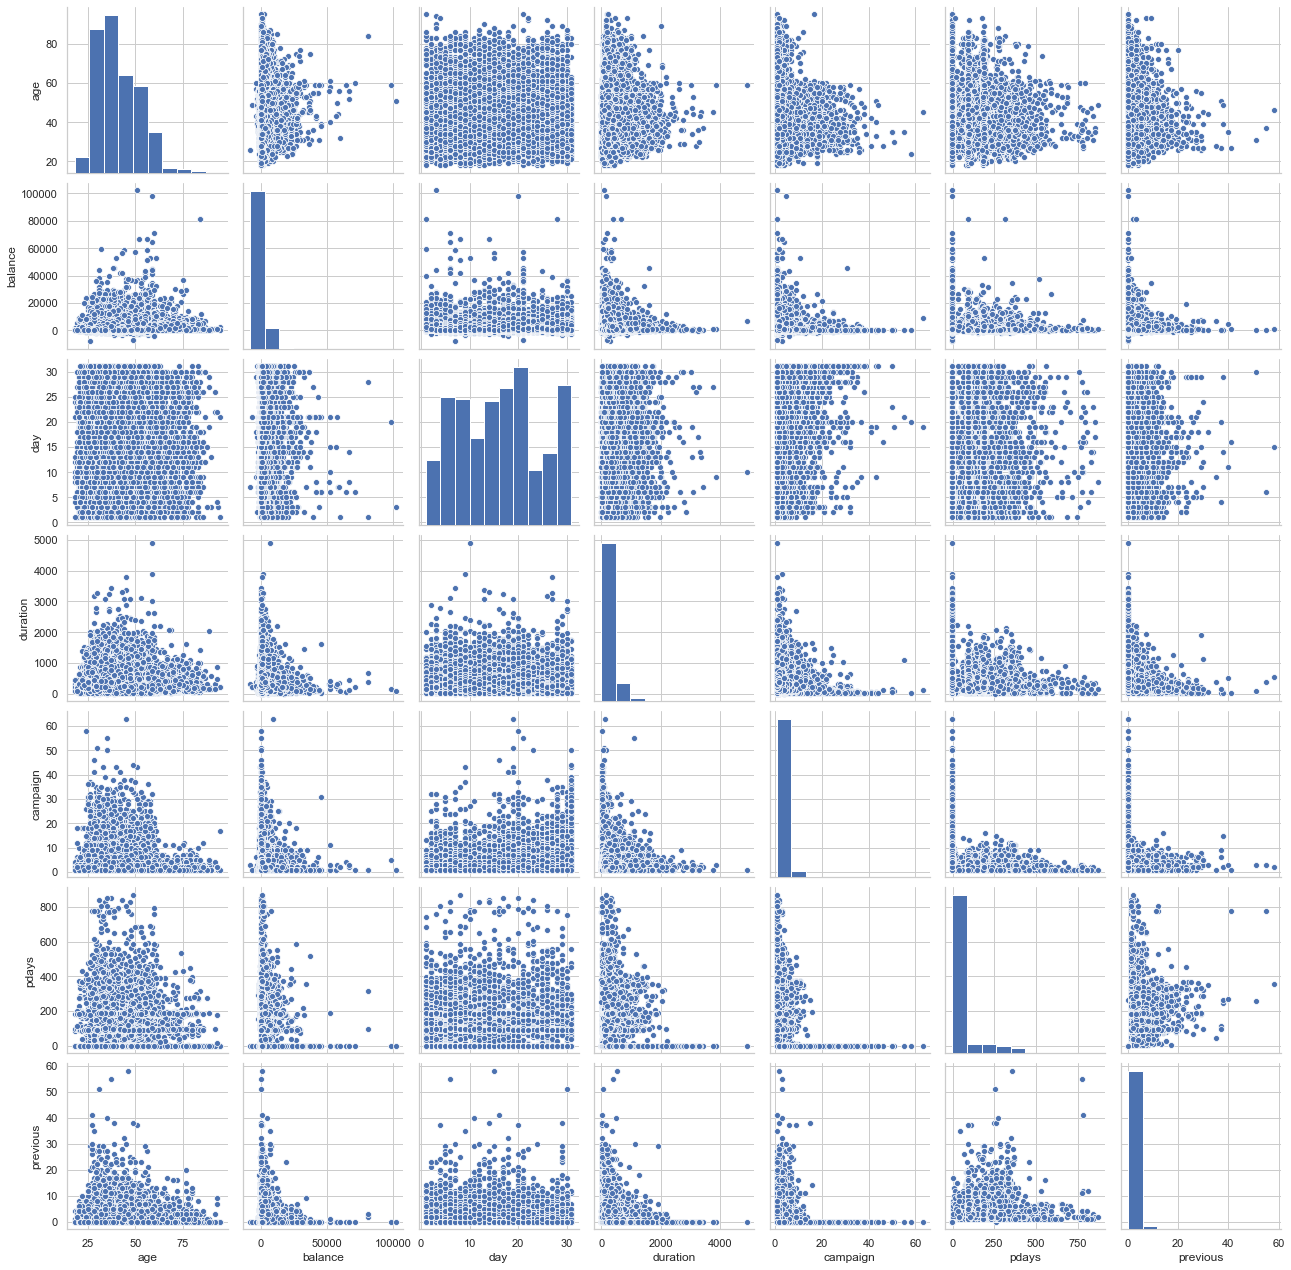

In [37]:
sns.pairplot(biv.select_dtypes(exclude ='object'));

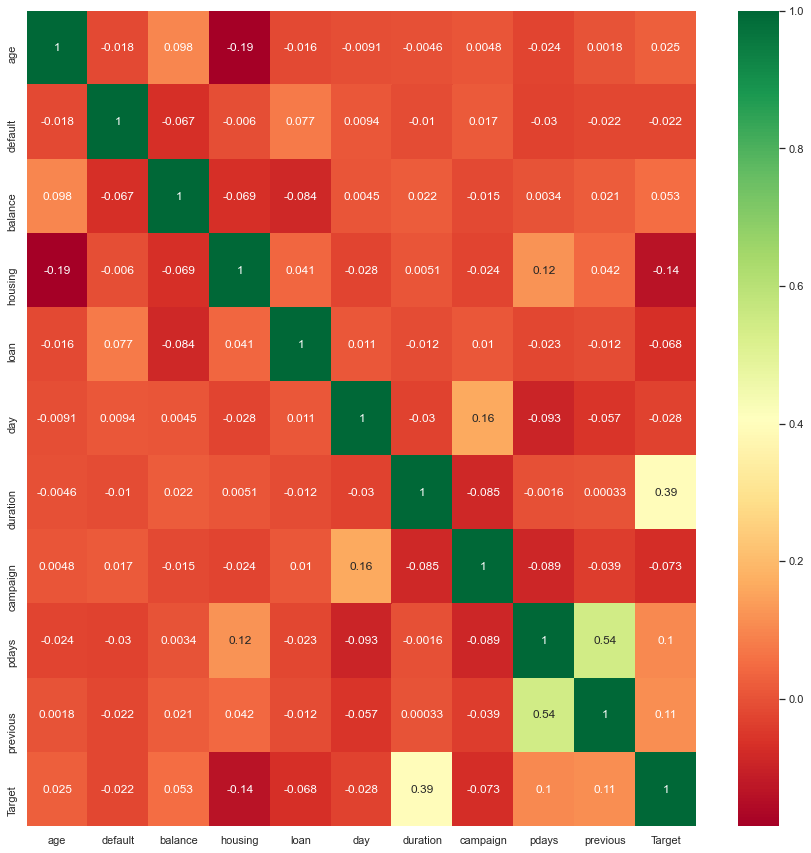

In [38]:
corrmat = bank_df.corr()
top_corr_features =corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(bank_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 2.0.- Prepare the data for analytics 
1. Ensure the attribute types are correct. If not, take appropriate actions. 
2. Get the data model ready.  
3. Transform the data i.e. scale / normalize if required 
4. Create the training set and test set in ratio of 70:30 

In [39]:
#changing objet to categorical data type
col_obj =bank_df.select_dtypes(include ='object')
for nun in col_obj:
    bank_df[nun] = bank_df[nun].astype('category')

In [40]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  float64 
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  int64   
dtypes: category(6), float64(1), int64(10)
memory usage: 4.1 MB


In [41]:
bank_df.nunique()


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       40
poutcome        4
Target          2
dtype: int64

<p style="color:blue;">2.1 Create Dummy Variables </p>

In [42]:
data = pd.get_dummies(bank_df, columns=['job','marital','education','default','housing','loan','contact','day','month','poutcome'])

In [43]:
data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'Target',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30', 'day_31', 'month_apr', 'month_aug',
       'month_dec', 'month_

In [133]:
data.isnull().count()

age                 45211
balance             45211
duration            45211
campaign            45211
pdays               45211
                    ...  
month_sep           45211
poutcome_failure    45211
poutcome_other      45211
poutcome_success    45211
poutcome_unknown    45211
Length: 82, dtype: int64

In [44]:
data.shape

(45211, 82)

<p style="color:blue;">2.2 Split Data X & y (70:30)</p>

In [45]:
X = data.drop(columns=['Target'])
X.shape

(45211, 81)

In [46]:
y = data['Target']
y.shape

(45211,)

In [47]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
# checking splitting data 70:30
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100), '- total of', len(X_train))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100),'- total of', len(X_test))

70.00% data is in training set - total of 31647
30.00% data is in test set - total of 13564


<p style="color:blue;">2.3 Applying SMOTE (Synthetic Minority Oversampling Technique) for Handling Imbalanced Datasets </p>

Percent of subscriptors to term deposit : 11.7 %
Percent of no subscriptors to term deposit : 88.3 %


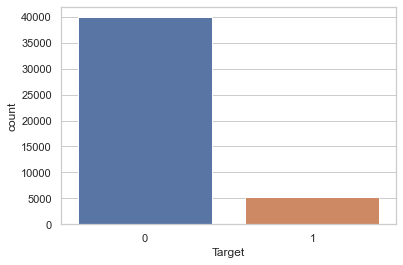

In [49]:
#Target analysis
sy = len(bank_df.Target[bank_df.Target==1])
sn = len(bank_df.Target[bank_df.Target==0])
print('Percent of subscriptors to term deposit :', round(sy/(sy+sn)*100,2),'%')
print('Percent of no subscriptors to term deposit :', round(sn/(sy+sn)*100,2),'%')
sns.countplot(x='Target', data=bank_df);

In [200]:
# Using the initial set of variables X & y
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, ADASYN

ms = SMOTE(random_state=0)
X_res, y_res = ms.fit_sample(X_train, y_train)

In [51]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_res))
print("Number of no term deposit in oversampled data",len(y_res[y_res==0]))
print("Number of term deposit",len(y_res[y_res==1]))
print("Proportion of no subscription data in oversampled data is ",len(y_res[y_res==0])/len(X_res))
print("Proportion of subscription data in oversampled data is ",len(y_res[y_res==1])/len(X_res))

length of oversampled data is  55906
Number of no term deposit in oversampled data 27953
Number of term deposit 27953
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


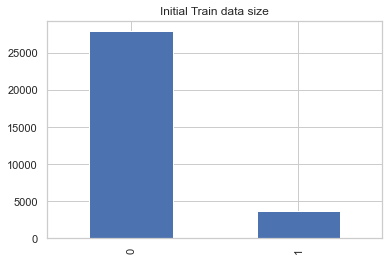

In [52]:
# initial train data size
ini = pd.Series(y_train).value_counts().plot.bar();
plt.title('Initial Train data size');

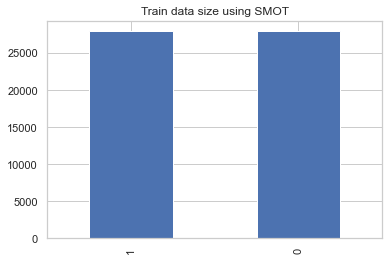

In [53]:
# New train data set has been balanced using SMOT
pd.Series(y_res).value_counts().plot.bar()
plt.title('Train data size using SMOT');

# 3.0.- Create the ensemble model 
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks) 
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks) 
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks) 

###  <p style="color:red;"> Defining a score and confision matrix function </p>

In [54]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

sc_tra,sc_tes,TPf,TNf,FPf,FNf = 0,0,0,0,0,0
Rec,Spec,Pres,Accu,f1,logit_roc_auc = 0,0,0,0,0,0

def score_confmetrics(model, X_train, y_train, X_test, y_test):
    global sc_tra,sc_tes,TPf,TNf,FPf,FNf,Rec,Spec,Pres,Accu,f1,logit_roc_auc
    ml_train = model.fit(X_train, y_train)
    sc_tra = round(ml_train.score(X_train, y_train),4)
    sc_tes = round(ml_train.score(X_test, y_test),4)
    # prediction
    y_predict = model.predict(X_test)
    #score the model
    print('\n' * 1)
    print('Model score_train :',round(sc_tra,4))
    print('Model score_test :',round(sc_tes,4))
    # confusion metrics
    confusion=confusion_matrix(y_test, y_predict)
    sns.heatmap(confusion, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    #Metric data
    print('\n' * 1)
    TPf = confusion[1,1]
    TNf = confusion[0,0]
    FPf = confusion[1,0]
    FNf = confusion[0,1]
    # classification report
    Rec = round(TPf/float(TPf+FNf),4)
    Spec = round(TNf/float(TNf+FPf),4)
    Pres = round(TPf/float(TPf+FPf),4)
    #Accu = round((TPf+TNf)/float(TPf+TNf+FPf+FNf),4)
    f1 = round(2*Pres*Rec/(Pres+Rec),4)
    print(classification_report(y_predict, y_test))
     # ROC Curve
    logit_roc_auc = round(roc_auc_score(y_test, model.predict(X_test)),4)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    # output
    return(sc_tra,sc_tes,TPf,TNf,FPf,FNf,Rec,Spec,Pres,Accu,f1,logit_roc_auc)

    

###  <p style="color:blue;"> 3.1.1.- Build Logistic Regression model </p>

#### <p style="color:red;"> Logistic Regression - Hyper Parameters Optimizaton </p>

In [55]:
from sklearn.linear_model import LogisticRegression
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [304]:
clas_LR = LogisticRegression()
params_LR={
    'solver'   : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty'  :['l1', 'l2', 'elasticnet', 'none'],
    'max_iter' :[100, 1000, 2000, 3000, 4000]
}
random_searchLR=RandomizedSearchCV(clas_LR,param_distributions=params_LR,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [305]:
random_searchLR.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   22.3s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.1min finished


In [306]:
random_searchLR.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 4000}



Model score_train : 0.9044
Model score_test : 0.9006


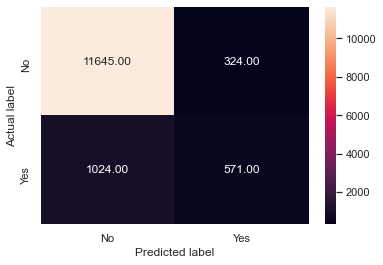



              precision    recall  f1-score   support

           0       0.97      0.92      0.95     12669
           1       0.36      0.64      0.46       895

    accuracy                           0.90     13564
   macro avg       0.67      0.78      0.70     13564
weighted avg       0.93      0.90      0.91     13564



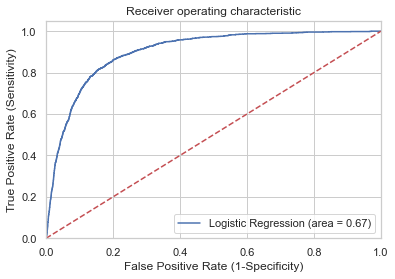

In [316]:
# Fit the model on train
model_LR = LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter= 4000, random_state=1)
# calling score_confmetrics funtion
model = model_LR
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_LR, ste_LR, TP_LR, TN_LR,FP_LR, FN_LR = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_LR,S_LR,P_LR,A_LR,f1_LR,l_LR = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.1.2.- Build Decision Tree Model </p>
We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split



Model score_train : 1.0
Model score_test : 0.8766


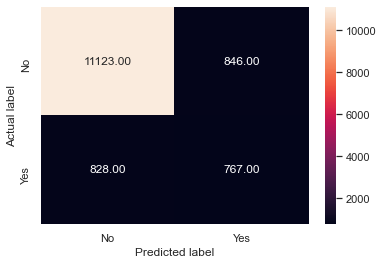



              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11951
           1       0.48      0.48      0.48      1613

    accuracy                           0.88     13564
   macro avg       0.71      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564



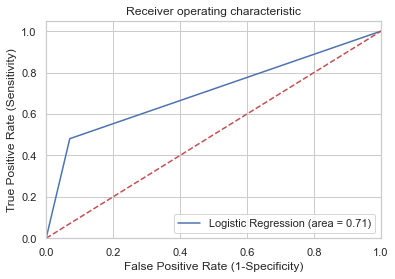

In [60]:
# decision tree number
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
# calling score_confmetrics funtion
model = dTree
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_DT, ste_DT, TP_DT, TN_DT,FP_DT, FN_DT = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_DT,S_DT,P_DT,A_DT,f1_DT,l_DT = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.1.3.- Build Decision Tree Model - Reducing Over fitting (Regularization)</p>

#### <p style="color:red;"> Decision Tree Classifier - Hyper Parameters Optimizaton </p>

In [307]:
clas_DTr = DecisionTreeClassifier()
#
params_DTr={
    'criterion'        :['gini','entropy'],
    'max_depth'        :[ 1, 3, 5, 7, 10, 13, 16],
    'min_samples_split':[ 2, 3, 5, 7, 10],
    'min_samples_leaf' :[ 1, 2, 3, 5, 7, 10],
}
#
random_searchDT=RandomizedSearchCV(clas_DTr,param_distributions=params_DTr,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [313]:
random_searchDT.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.5s finished


In [314]:
random_searchDT.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_depth': 5,
 'criterion': 'entropy'}



Model score_train : 0.9042
Model score_test : 0.8971


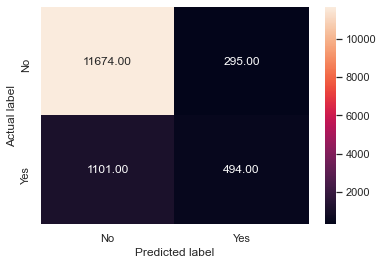



              precision    recall  f1-score   support

           0       0.98      0.91      0.94     12775
           1       0.31      0.63      0.41       789

    accuracy                           0.90     13564
   macro avg       0.64      0.77      0.68     13564
weighted avg       0.94      0.90      0.91     13564



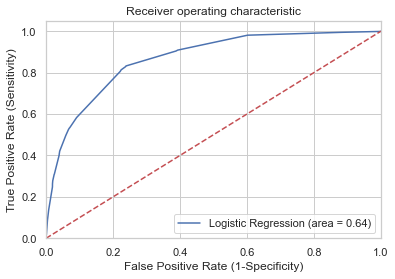

In [315]:
# decision tree number
dTree_r = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=10, random_state=1 )
# calling score_confmetrics funtion
model = dTree_r
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_DTr, ste_DTr, TP_DTr, TN_DTr,FP_DTr, FN_DTr = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_DTr,S_DTr,P_DTr,A_DTr,f1_DTr,l_DTr = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:green;"> 3.1.3.- Visualization - Reducing over fitting</p>

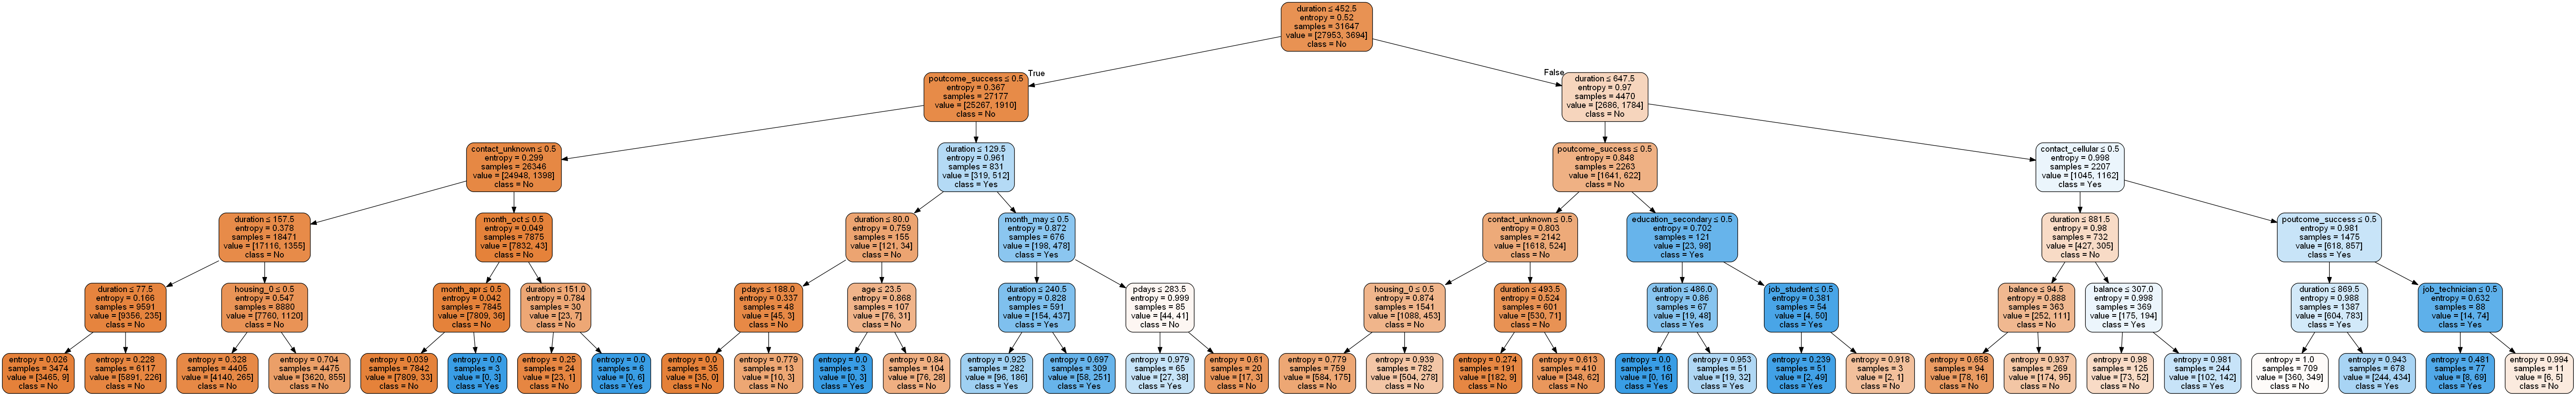

In [310]:
from sklearn.tree import export_graphviz
import io
from io import StringIO
from IPython.display import Image
import pydotplus
import graphviz
#
xvar = data.drop(columns=['Target'])
feature_cols = xvar.columns
train_char_label = ['No', 'Yes']

bank_tar = StringIO()
export_graphviz(dTree_r, out_file=bank_tar,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=train_char_label)
graph_bt = pydotplus.graph_from_dot_data(bank_tar.getvalue())  
graph_bt.write_png('bank_target.png')
Image(graph_bt.create_png())

### <p style="color:blue;"> 3.2.1.-  Ensemble learning - Bagging </p>

#### <p style="color:red;"> Bagging Classifier - Hyper Parameters Optimizaton </p>

In [66]:
from sklearn.ensemble import BaggingClassifier

In [67]:
clas_B = BaggingClassifier()
#
params_B={
    'n_estimators' :[10, 25, 50, 75, 100],
    'max_samples'  :[0.01, 0.1, 0.5, 0.75, 1.0],
    'max_features'  :[0.01, 0.1, 0.5, 0.75, 1.0]
}
#
random_searchB=RandomizedSearchCV(clas_B,param_distributions=params_B,
                                  n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [325]:
random_searchB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   31.2s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   40.4s finished


In [326]:
random_searchB.best_params_

{'n_estimators': 75, 'max_samples': 0.75, 'max_features': 0.75}



Model score_train : 0.8988
Model score_test : 0.8924


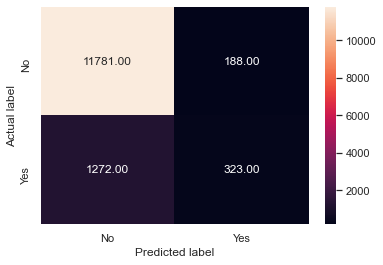



              precision    recall  f1-score   support

           0       0.98      0.90      0.94     13053
           1       0.20      0.63      0.31       511

    accuracy                           0.89     13564
   macro avg       0.59      0.77      0.62     13564
weighted avg       0.95      0.89      0.92     13564



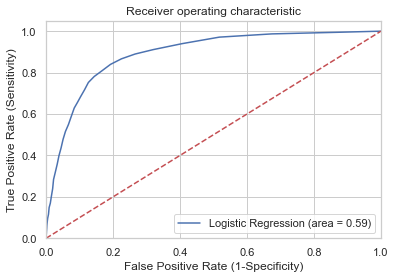

In [324]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= 0.01,max_features= 0.75, random_state=1)
# calling score_confmetrics funtion
model = bgcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_bg, ste_bg, TP_bg, TN_bg,FP_bg, FN_bg = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_bg,S_bg,P_bg,A_bg,f1_bg,l_bg = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.2.2.-  Ensemble learning - RandomForest Classifier (Reducing Overfitting)</p>  

#### <p style="color:red;"> Random Forest Classifier - Hyper Parameters Optimizaton </p>

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
clas_RF = RandomForestClassifier()
#
params_RF={
    'criterion'        :['gini','entropy'],
    'n_estimators' :[100, 250, 500, 750, 1000],
    'max_depth'        :[ 1, 3, 5, 7, 10, 13, 16],
    'min_samples_split' :[2, 3, 5, 7, 10, 15],
    'min_samples_leaf' :[1, 2, 3, 5, 7, 10, 15]
}
#
random_searchRF=RandomizedSearchCV(clas_RF,param_distributions=params_RF,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [73]:
random_searchRF.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.5min remaining:   28.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.7min finished


In [74]:
random_searchRF.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 13,
 'criterion': 'entropy'}



Model score_train : 0.9174
Model score_test : 0.8983


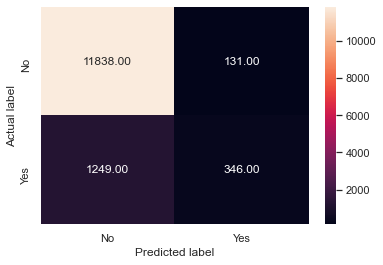



              precision    recall  f1-score   support

           0       0.99      0.90      0.94     13087
           1       0.22      0.73      0.33       477

    accuracy                           0.90     13564
   macro avg       0.60      0.81      0.64     13564
weighted avg       0.96      0.90      0.92     13564



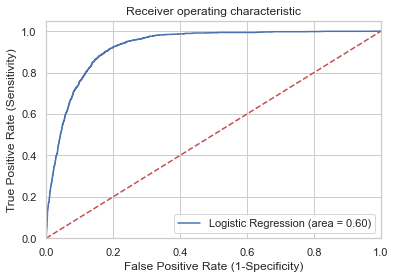

In [75]:
rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators = 1000, max_depth=15, 
                              min_samples_split=15, min_samples_leaf=2,random_state=1)
# calling score_confmetrics funtion
model = rfcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_rf, ste_rf, TP_rf, TN_rf,FP_rf, FN_rf = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_rf,S_rf,P_rf,A_rf,f1_rf,l_rf = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.2.3.-  Ensemble learning - AdaBoosting </p>

#### <p style="color:red;"> AdaBoosting Classifier - Hyper Parameters Optimizaton </p>

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
clas_AB = AdaBoostClassifier()
#
params_AB={
    'n_estimators' :[50, 100, 150, 200, 250],
    'learning_rate'  :[0.1, 0.3, 0.5, 0.75, 1.0],
}
#
random_searchAB=RandomizedSearchCV(clas_AB,param_distributions=params_AB,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [78]:
random_searchAB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   40.7s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   49.4s finished


In [79]:
random_searchAB.best_params_

{'n_estimators': 250, 'learning_rate': 0.3}



Model score_train : 0.9036
Model score_test : 0.898


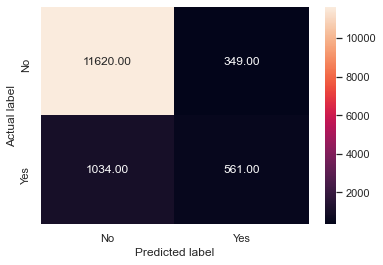



              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12654
           1       0.35      0.62      0.45       910

    accuracy                           0.90     13564
   macro avg       0.66      0.77      0.70     13564
weighted avg       0.93      0.90      0.91     13564



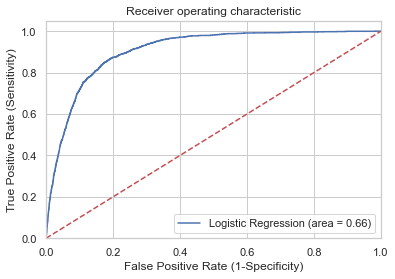

In [80]:
abcl = AdaBoostClassifier(n_estimators=150, learning_rate=0.3, random_state=1)
# calling score_confmetrics funtion
model = abcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_ab, ste_ab, TP_ab, TN_ab,FP_ab, FN_ab = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_ab,S_ab,P_ab,A_ab,f1_ab,l_ab = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.2.4.-  Ensemble learning - GradientBoost </p> 

#### <p style="color:red;"> GradientBoost Classifier - Hyper Parameters Optimizaton </p>

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
clas_GB = GradientBoostingClassifier()
#
params_GB={
    'n_estimators' :[100, 150, 200, 250],
    'learning_rate'  :[0.01, 0.05, 0.075, 0.1],
    'max_depth'  :[1,2,3],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf' :[2, 3, 5, 7, 10],
}
#
random_searchGB=RandomizedSearchCV(clas_GB,param_distributions=params_GB,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [83]:
random_searchGB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   26.6s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   30.6s finished


In [84]:
random_searchGB.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 3,
 'learning_rate': 0.05}



Model score_train : 0.9043
Model score_test : 0.8972


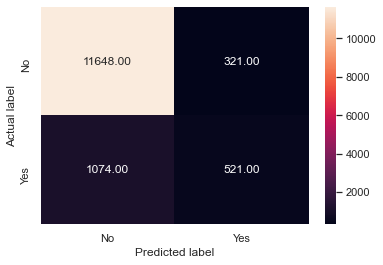



              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12722
           1       0.33      0.62      0.43       842

    accuracy                           0.90     13564
   macro avg       0.65      0.77      0.69     13564
weighted avg       0.93      0.90      0.91     13564



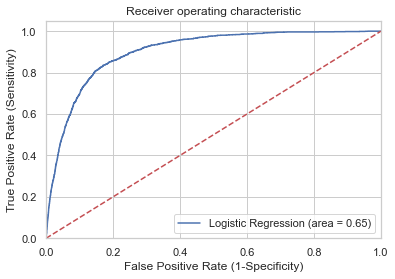

In [85]:
gbcl = GradientBoostingClassifier(n_estimators = 200, max_depth=1, 
                                  learning_rate=0.1, min_samples_leaf=2,
                                  min_samples_split=2, random_state=1)
# calling score_confmetrics funtion
model = gbcl
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_gb, ste_gb, TP_gb, TN_gb,FP_gb, FN_gb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_gb,S_gb,P_gb,A_gb,f1_gb,l_gb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.2.5.-  Ensemble learning - XGBoost Classifier </p>  

In [86]:
# Install xgboost first
# ! pip install --upgrade xgboost;

In [87]:
import xgboost as xgb

#### <p style="color:red;"> XGBoost Classifier - Hyper Parameters Optimizaton </p>

In [88]:
classifier = xgb.XGBClassifier()
#
params={
    "learning_rate"    :[0.001, 0.05, 0.1, 0.5, 0.75, 0.1],
    "max_depth"        :[   1,    2,   3],
    "min_child_weight" :[   1,    3,    5,    7],
    "gamma"            :[0.0,   0.1,  0.2,  0.3, 0.4],
    "colsample_bytree" :[0.3,   0.4,  0.5,  0.7]
}
#
random_search=RandomizedSearchCV(classifier,param_distributions=params,
                                 n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [89]:
random_search.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   21.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   23.4s finished


In [90]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 2,
 'learning_rate': 0.5,
 'gamma': 0.0,
 'colsample_bytree': 0.4}



Model score_train : 0.9154
Model score_test : 0.9042


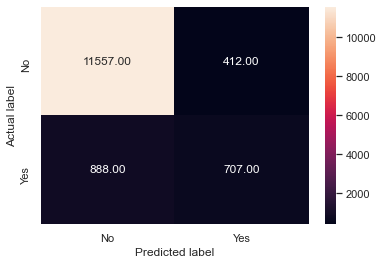



              precision    recall  f1-score   support

           0       0.97      0.93      0.95     12445
           1       0.44      0.63      0.52      1119

    accuracy                           0.90     13564
   macro avg       0.70      0.78      0.73     13564
weighted avg       0.92      0.90      0.91     13564



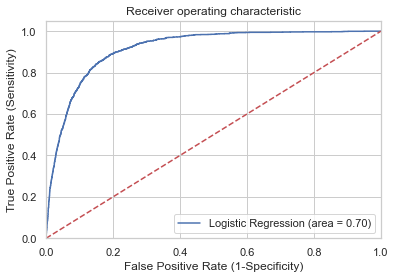

In [91]:
xgb_m = xgb.XGBClassifier(min_child_weight= 5,
                          max_depth= 2,
                          learning_rate= 0.75,
                          gamma= 0.1,
                          colsample_bytree= 0.4, random_state=1)
#
# calling score_confmetrics funtion
model = xgb_m
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_xgb, ste_xgb, TP_xgb, TN_xgb,FP_xgb, FN_xgb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_xgb,S_xgb,P_xgb,A_xgb,f1_xgb,l_xgb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### <p style="color:blue;"> 3.2.6.-  Ensemble learning - LightGBM </p>  

In [92]:
# Install lightgbm first
# ! pip install --upgrade lightgbm;

#### <p style="color:red;"> XLightGBM Classifier - Hyper Parameters Optimizaton </p>

In [93]:
import lightgbm as lgbm

In [94]:
clas_LGB = lgbm.LGBMClassifier()
#
params_LGB={
    'n_estimators' :[100, 150, 200, 250],
    'learning_rate'  :[0.02, 0.04, 0.06, 0.08, 0.1]
}
#
random_searchLGB=RandomizedSearchCV(clas_LGB,param_distributions=params_LGB,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3);

In [95]:
random_searchLGB.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    5.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.1s finished


In [96]:
random_searchLGB.best_params_

{'n_estimators': 100, 'learning_rate': 0.08}



Model score_train : 0.9225
Model score_test : 0.9045


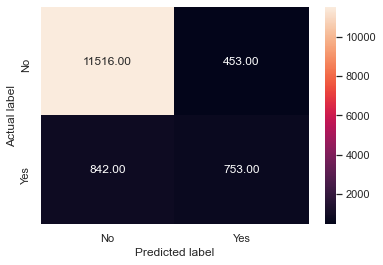



              precision    recall  f1-score   support

           0       0.96      0.93      0.95     12358
           1       0.47      0.62      0.54      1206

    accuracy                           0.90     13564
   macro avg       0.72      0.78      0.74     13564
weighted avg       0.92      0.90      0.91     13564



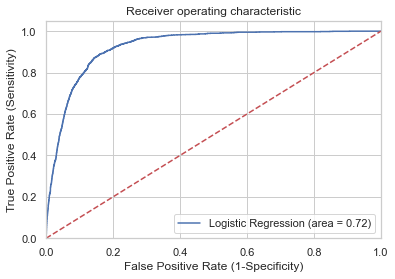

In [97]:
lgbm_m = lgbm.LGBMClassifier(n_estimators = 150, learning_rate=0.04, random_state=1)
# calling score_confmetrics funtion
model = lgbm_m
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_lgb, ste_lgb, TP_lgb, TN_lgb,FP_lgb, FN_lgb = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_lgb,S_lgb,P_lgb,A_lgb,f1_lgb,l_lgb = Rec,Spec,Pres,Accu,f1,logit_roc_auc

### Summary of the Algoritms

In [328]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression','Decision Tree- Reduce Overfit',
                                    'Bagging','RandomForest - Reduce Overfit',
                                    'AdaBoosting','GradientBoost','XGBoost','LightGBM'], 
                         'Score_Train':   [str_LR,str_DTr,str_bg,str_rf,str_ab,str_gb,str_xgb,str_lgb],
                         'Score_Test':    [ste_LR,ste_DTr,ste_bg,ste_rf,ste_ab,ste_gb,ste_xgb,ste_lgb],
                         'True Positive': [ TP_LR, TP_DTr, TP_bg, TP_rf, TP_ab, TP_gb, TP_xgb, TP_lgb],
                         'True Negative': [ TN_LR, TN_DTr, TN_bg, TN_rf, TN_ab, TN_gb, TN_xgb, TN_lgb],
                         'False Positive':[ FP_LR, FP_DTr, FP_bg, FP_rf, FP_ab, FP_gb, FP_xgb, FP_lgb],
                         'False Negative':[ FN_LR, FN_DTr, FN_bg, FN_rf, FN_ab, FN_gb, FN_xgb, FN_lgb],
                         'Recall':        [  R_LR,  R_DTr,  R_bg,  R_rf,  R_ab,  R_gb,  R_xgb,  R_lgb],
                         'Specifity':     [  S_LR,  S_DTr,  S_bg,  S_rf,  S_ab,  S_gb,  S_xgb,  S_lgb],
                         'Precision':     [  P_LR,  P_DTr,  P_bg,  P_rf,  P_ab,  P_gb,  P_xgb,  P_lgb],
                         'F1':            [ f1_LR, f1_DTr, f1_bg, f1_rf, f1_ab, f1_gb, f1_xgb, f1_lgb],
                         'Area U_Curve':  [  l_LR,  l_DTr,  l_bg,  l_rf,  l_ab,  l_gb,  l_xgb,  l_lgb] })

resultsDf = resultsDf[['Method', 'Score_Train','Score_Test','True Positive','True Negative','False Positive',
                       'False Negative','Recall','Specifity','Precision','F1','Area U_Curve']]

In [329]:
resultsDf=resultsDf.sort_values(by=['Area U_Curve']).set_index('Method')

In [330]:
resultsDf

,Score_Train,Score_Test,True Positive,True Negative,False Positive,False Negative,Recall,Specifity,Precision,F1,Area U_Curve
Method,,,,,,,,,,,
Bagging,0.8988,0.8924,323,11781,1272,188,0.6321,0.9026,0.2025,0.3067,0.5934
RandomForest - Reduce Overfit,0.9174,0.8983,346,11838,1249,131,0.7254,0.9046,0.2169,0.3339,0.6030
Decision Tree- Reduce Overfit,0.9042,0.8971,494,11674,1101,295,0.6261,0.9138,0.3097,0.4144,0.6425
GradientBoost,0.9043,0.8972,521,11648,1074,321,0.6188,0.9156,0.3266,0.4275,0.6499
AdaBoosting,0.9036,0.8980,561,11620,1034,349,0.6165,0.9183,0.3517,0.4479,0.6613
Logistic Regression,0.9044,0.9006,571,11645,1024,324,0.6380,0.9192,0.3580,0.4586,0.6655
XGBoost,0.9154,0.9042,707,11557,888,412,0.6318,0.9286,0.4433,0.5210,0.7044
LightGBM,0.9225,0.9045,753,11516,842,453,0.6244,0.9319,0.4721,0.5377,0.7171


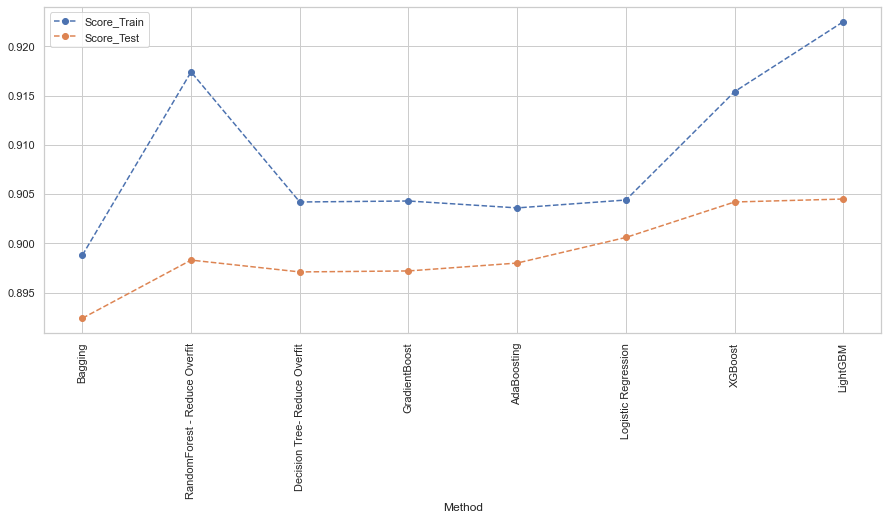

In [331]:
ax=resultsDf[['Score_Train','Score_Test']]
ax.plot(figsize=(15,6), rot=90, mark_right=True, linestyle='--', marker='o');

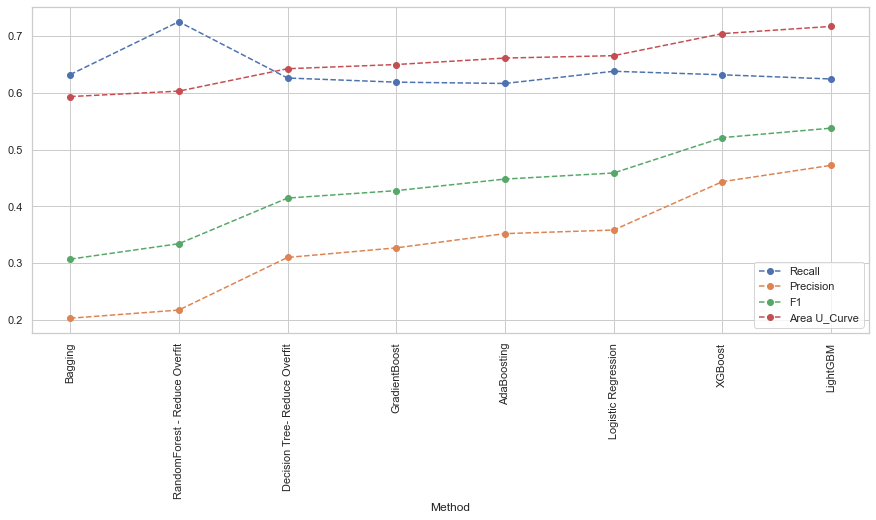

In [332]:
ax =resultsDf[['Recall','Precision','F1', 'Area U_Curve']]
ax.plot(figsize=(15,6), rot=90, mark_right=True, linestyle='--', marker='o');

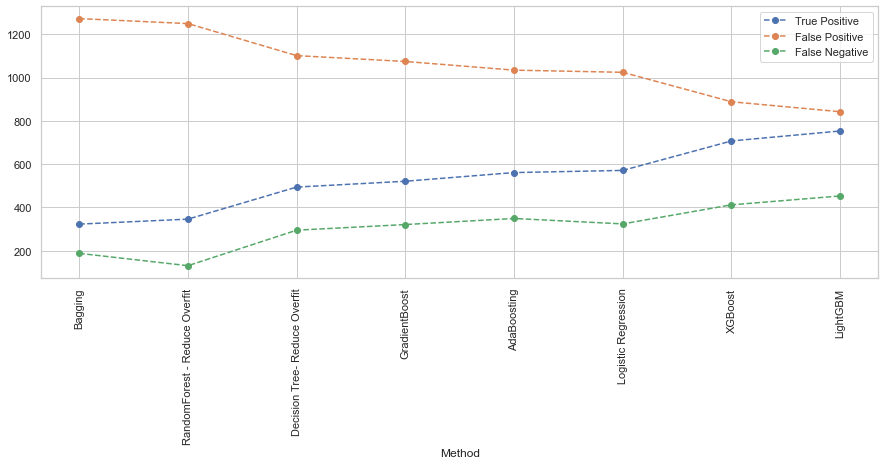

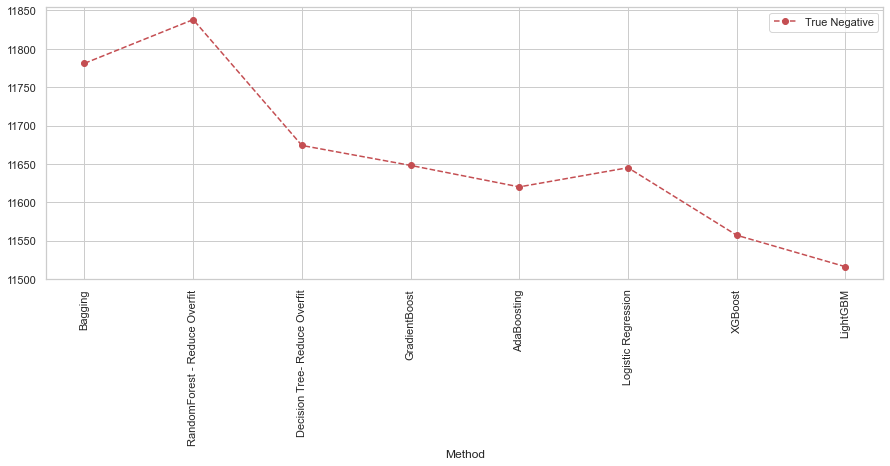

In [333]:
ax = resultsDf[['True Positive','False Positive','False Negative']]
ax.plot(figsize=(15,5), rot=90, mark_right=True, linestyle='--', marker='o');

ax = resultsDf[['True Negative']]
ax.plot(figsize=(15,5), rot=90, mark_right=True, linestyle='--', marker='o', color='r');

In [334]:
resultsDf.describe()

,Score_Train,Score_Test,True Positive,True Negative,False Positive,False Negative,Recall,Specifity,Precision,F1,Area U_Curve
count,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.908825,0.899037,534.50000,11659.875000,1060.50000,309.125000,0.639138,0.916825,0.335100,0.430962,0.654637
std,0.008392,0.003995,151.94924,106.794111,151.94924,106.794111,0.035575,0.010255,0.095280,0.080799,0.043304
min,0.898800,0.892400,323.00000,11516.000000,842.00000,131.000000,0.616500,0.902600,0.202500,0.306700,0.593400
25%,0.904050,0.897175,457.00000,11604.250000,990.00000,268.250000,0.623000,0.911500,0.286500,0.394275,0.632625
50%,0.904350,0.898150,541.00000,11646.500000,1054.00000,322.500000,0.628950,0.916950,0.339150,0.437700,0.655600
75%,0.915900,0.901500,605.00000,11700.750000,1138.00000,364.750000,0.633575,0.921550,0.379325,0.474200,0.675225
max,0.922500,0.904500,753.00000,11838.000000,1272.00000,453.000000,0.725400,0.931900,0.472100,0.537700,0.717100


# Final Observations:

1.- The lowest two performace models: Baggin and RandomForest.

2.- the best two performance models: XGBoost and LightGBM (Best Algoritm).

3.- Hyperparameters optimization was used in all the models

4.- "rou_auc" was used as scoring reference

5.- Score train is slightly higher than Score_Test (Aveg. Score test using all the models =89.99%)

6.- There is not difference not using or using SMOT in Logistic Regression

7.- Algorit shows a better performance in this order:
    - (1) Bagging, (2) RandomForest-Red. Overfit, (3) Decision Tree-Red. Overfit, (4) GradientBoost
    (5) AdaBoosting, (6) Logistic Regression, (7) XGBoost, (8) LightGBM

#### <p style="color:red;"> Logistic Regression - Applying SMOT </p>

In [335]:
ms = SMOTE(random_state=0)
X_res, y_res = ms.fit_sample(X_train, y_train)

In [336]:
# evaluating P values
import statsmodels.api as sm
logit = sm.Logit( y_res, X_res )
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.134326
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.806     
Dependent Variable:  Target            AIC:               15181.2049
Date:                2020-07-31 17:11  BIC:               15904.6505
No. Observations:    55906             Log-Likelihood:    -7509.6   
Df Model:            80                LL-Null:           -38751.   
Df Residuals:        55825             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      13.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
age                  0.0083   0.0026   3.2199 0.0013  0.0032  0.0133
balance              0.0000   0.0000   2.4881 0.0128  0.0000  0.0000
duration             0.0045   0.0001  56.5787 0.0000  0.0043  0.0046
campaign            -0.0869   0.0122  -7.1044 0.0000 -0.1109 -0.0630
pdays                0.0009   0.0004   2.4227 0.0154  0.0002  0.0016
previous             0.0405   0.0112   3.6148 0.0003  0.0185  0.0625
job_admin.          -4.5688   0.4102 -11.1386 0.0000 -5.3727 -3.7648
job_blue-collar     -4.7682   0.4089 -11.6597 0.0000 -5.5697 -3.9666
job_entrepreneur    -4.9877   0.4244 -11.7516 0.0000 -5.8196 -4.1559
job_housemaid       -5.2431   0.4358 -12.0306 0.0000 -6.0973 -4.3889
job_management      -4.7562   0.4078 -11.6630 0.0000 -5.5555 -3.9570
job_retired         -4.4587   0.4148 -10.7495 0.0000 -5.2716 -3.6457
job_self-employed   -4.7832   0.4200 -11.3877 0.0000 -5.6064 -3.9599
job_services        -4.7663   0.4131 -11.5376 0.0000 -5.5760 -3.9566
job_student         -4.2083   0.4239  -9.9268 0.0000 -5.0392 -3.3774
job_technician      -4.7330   0.4084 -11.5885 0.0000 -5.5335 -3.9325
job_unemployed      -4.6381   0.4207 -11.0239 0.0000 -5.4627 -3.8135
job_unknown         -4.8515   0.4831 -10.0422 0.0000 -5.7983 -3.9046
marital_divorced    -2.0154   0.3220  -6.2586 0.0000 -2.6466 -1.3843
marital_married     -2.2132   0.3156  -7.0132 0.0000 -2.8318 -1.5947
marital_single      -1.8798   0.3160  -5.9489 0.0000 -2.4992 -1.2605
education_primary   -2.1985   0.3559  -6.1772 0.0000 -2.8961 -1.5010
education_secondary -1.9510   0.3499  -5.5754 0.0000 -2.6369 -1.2651
education_tertiary  -1.7747   0.3523  -5.0368 0.0000 -2.4652 -1.0841
education_unknown   -2.0268   0.3655  -5.5456 0.0000 -2.7432 -1.3105
default_0            9.1786   0.5680  16.1591 0.0000  8.0653 10.2919
default_1            9.1113   0.6017  15.1427 0.0000  7.9320 10.2907
housing_0            0.7767   0.3264   2.3797 0.0173  0.1370  1.4164
housing_1            0.1079   0.3274   0.3296 0.7417 -0.5337  0.7496
loan_0               1.7502   0.3279   5.3373 0.0000  1.1075  2.3929
loan_1               1.2578   0.3347   3.7577 0.0002  0.6018  1.9139
contact_cellular     3.2637   0.3680   8.8691 0.0000  2.5424  3.9849
contact_telephone    2.9415   0.3792   7.7566 0.0000  2.1982  3.6847
contact_unknown      1.4840   0.3782   3.9237 0.0001  0.7427  2.2254
day_1               -6.2931   0.4441 -14.1720 0.0000 -7.1635 -5.4228
day_2               -6.2224   0.4161 -14.9530 0.0000 -7.0380 -5.4068
day_3               -6.0600   0.4165 -14.5490 0.0000 -6.8764 -5.2437
day_4               -6.1314   0.4131 -14.8432 0.0000 -6.9410 -5.3218
day_5               -6.4749   0.4125 -15.6960 0.0000 -7.2834 -5.6664
day_6               -6.3697   0.4147 -15.3588 0.0000 -7.1826 -5.5569
day_7               -6.3862   0.4158 -15.3584 0.0000 -7.2012 -5.5712
day_8               -6.1416   0.4115 -14.9238 0.0000 -6.9482 -5.3350
day_9               -6.0370   0.4165 -14.4952 0.0000 -6.8533 -5.2207
day_10              -5.7075   0.4288 -13.3100 0.0000 -6.5480 -4.8671
day_11              -6.2379   0.4141 -15.0638



Model score_train : 0.9454
Model score_test : 0.9007


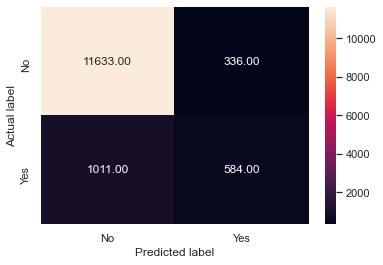



              precision    recall  f1-score   support

           0       0.97      0.92      0.95     12644
           1       0.37      0.63      0.46       920

    accuracy                           0.90     13564
   macro avg       0.67      0.78      0.70     13564
weighted avg       0.93      0.90      0.91     13564



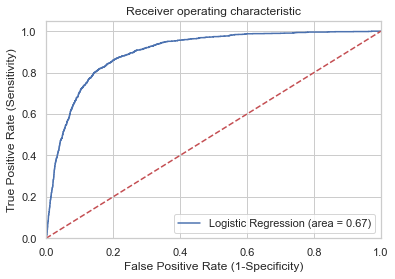

In [346]:
# Fit the model on train
model_LRS = LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter= 4000, random_state=1)
# calling score_confmetrics funtion
model = model_LRS
X_train = X_res
y_train = y_res
score_confmetrics(model, X_train, y_train, X_test, y_test)
# Tranfering data
str_LRS, ste_LRS, TP_LRS, TN_LRS,FP_LRS, FN_LRS = sc_tra,sc_tes,TPf,TNf,FPf,FNf
R_LRS,S_LRS,P_LRS,A_LRS,f1_LRS,l_LRS = Rec,Spec,Pres,Accu,f1,logit_roc_auc

There is almost not difference using or not using SMOT in Logistic Regression